In [1]:
%pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.4/544.4 kB 8.6 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat

In [2]:
raw_welfare = pd.read_spss("./data/Koweps_hpwc14_2019_beta2.sav")

In [3]:
welfare = raw_welfare.copy()

In [4]:
welfare.head()

h14_id  h14_ind  h14_sn  h14_merkey  h_new  h14_cobf   p14_wsc   p14_wsl  \
0     2.0      1.0     1.0     20101.0    0.0       NaN  0.291589  0.291589   
1     3.0      1.0     1.0     30101.0    0.0       NaN  0.419753  0.419753   
2     4.0      1.0     1.0     40101.0    0.0       NaN  0.265263  0.265980   
3     6.0      1.0     1.0     60101.0    0.0       NaN  0.494906  0.495941   
4     6.0      1.0     1.0     60101.0    0.0       NaN  1.017935  1.017935   

       p14_wgc      p14_wgl  ...  wc14_64  wc14_65  wc14_5aq4  wc14_5aq5  \
0  1307.764781  1307.764781  ...      NaN                 NaN        NaN   
1  1882.570960  1882.570960  ...      NaN                 NaN        NaN   
2  1189.691668  1192.908537  ...      NaN                 NaN        NaN   
3  2219.630833  2224.273816  ...      1.0        .        2.0        4.0   
4  4565.389177  4565.389177  ...      1.0        .        1.0        5.0   

   wc14_5aq6  h14_pers_income1  h14_pers_income2  h14_pers_income3  \
0        NaN               NaN               NaN               NaN   
1        NaN               NaN               NaN               NaN   
2        NaN               NaN            1284.0               NaN   
3        4.0            2304.0               NaN            1800.0   
4        2.0               NaN               NaN               NaN   

   h14_pers_income4  h14_pers_income5  
0               0.0               NaN  
1               0.0               NaN  
2               0.0               NaN  
3               0.0               NaN  
4               0.0               NaN  

[5 rows x 830 columns]

In [5]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [6]:
welfare.shape

(14418, 830)

In [7]:
welfare = welfare.rename(
    columns={
        'h14_g3' : 'sex',
        'h14_g4' : 'birth',
        'h14_g10' : 'marriage_type',
        'h14_g11':'religion',
        'p1402_8aq1' : 'income',
        'h14_eco9' : 'code_job',
        'h14_reg7': 'code_region'
    }
)

In [8]:
welfare[['sex','birth','marriage_type', 'religion', 'income', 'code_job', 'code_region']]

sex   birth  marriage_type  religion  income  code_job  code_region
0      2.0  1945.0            2.0       1.0     NaN       NaN          1.0
1      1.0  1948.0            2.0       2.0     NaN       NaN          1.0
2      1.0  1942.0            3.0       1.0   107.0     762.0          1.0
3      1.0  1962.0            1.0       1.0   192.0     855.0          1.0
4      2.0  1963.0            1.0       1.0     NaN       NaN          1.0
...    ...     ...            ...       ...     ...       ...          ...
14413  2.0  1967.0            1.0       1.0     NaN       NaN          5.0
14414  2.0  1992.0            5.0       1.0     NaN       NaN          5.0
14415  1.0  1995.0            5.0       1.0     NaN     910.0          5.0
14416  2.0  1998.0            5.0       1.0   200.0     246.0          5.0
14417  1.0  2001.0            0.0       1.0     NaN       NaN          5.0

[14418 rows x 7 columns]

In [11]:
welfare['sex'].dtype

dtype('float64')

In [12]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [13]:
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex']) # np.where(조건, 조건에 부합할 경우, 아닌 경우)
welfare['sex'].isna().sum()

In [15]:
welfare['sex'] = np.where(welfare['sex']== 1, 'male', 'female')

In [16]:
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

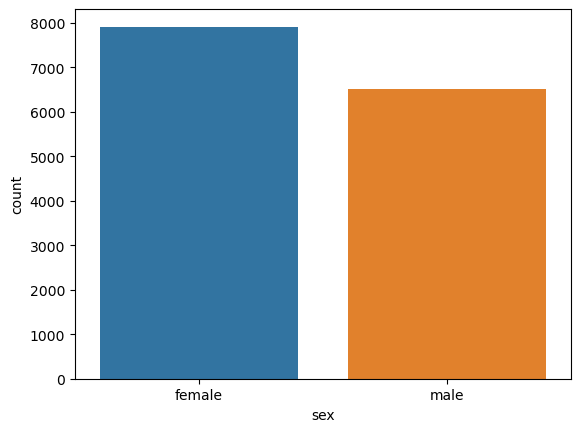

In [17]:
sns.countplot(data=welfare, x='sex')

In [20]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='Count'>

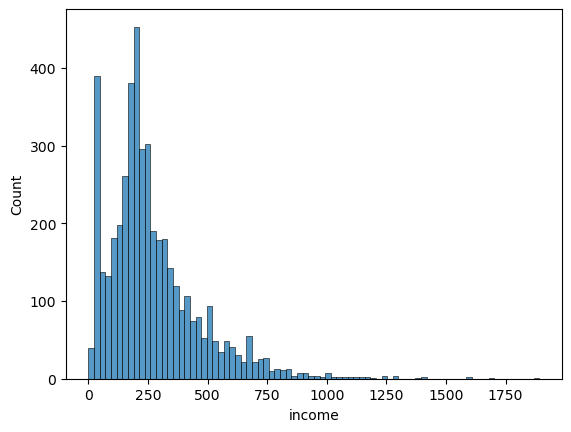

In [21]:
sns.histplot(data=welfare, x='income')

In [22]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [31]:
welfare['income'].isna().sum()

9884

In [33]:
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [38]:
welfare['income'].isna().sum()

9884

In [43]:
sex_income = welfare.dropna(subset=['income']).groupby('sex', as_index=False).agg(mean_income = ('income', 'mean'))

In [44]:
sex_income

sex  mean_income
0  female   186.293096
1    male   349.037571

<Axes: xlabel='sex', ylabel='mean_income'>

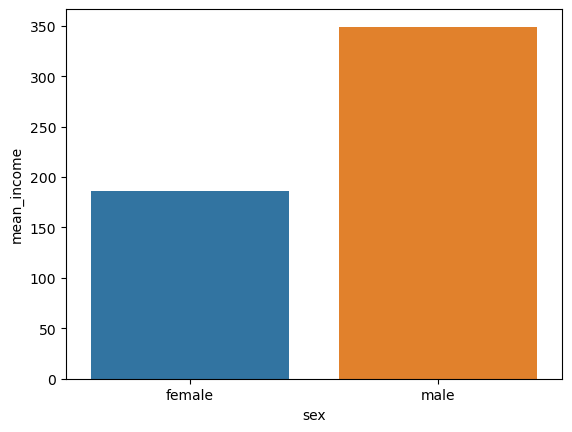

In [45]:
sns.barplot(data = sex_income, x='sex', y='mean_income')